# 흡연유무 분류 모델

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## 1. 데이터 불러오기 및 확인

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
data=pd.read_csv('C:/Users/wandong/OneDrive/바탕 화면/dongguk/4-2/통계모델링2/기말프로젝트/data/health.csv')

In [4]:
data.describe()

,Unnamed: 0,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN,BMI
count,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000
mean,767018.428712,33.164656,1.536080,11.616129,161.063666,62.359435,81.135700,0.464447,0.465615,1.053669,1.053468,122.139243,75.261816,99.115343,199.326688,115.302405,56.980371,119.453359,13.608813,0.002183,0.270692,24.467310,22.284615,25.800816,1.491938,0.592717,0.151547,0.501034,23.934795
std,114704.726114,12.638706,0.498699,2.189934,9.037231,11.821194,9.418695,0.506264,0.505133,0.225365,0.224966,14.231790,9.633969,13.289881,39.585288,61.021471,14.049279,35.986833,1.514970,0.046673,0.451566,6.865542,10.345981,14.866859,0.740010,0.491331,0.358583,0.500001,3.441678
min,574476.000000,11.000000,1.000000,9.000000,130.000000,30.000000,50.000000,0.000000,0.000000,1.000000,1.000000,76.000000,36.000000,48.000000,69.000000,7.000000,5.000000,6.000000,7.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,12.486993
25%,667473.750000,27.000000,1.000000,10.000000,155.000000,55.000000,74.000000,0.000000,0.000000,1.000000,1.000000,112.000000,69.000000,90.000000,172.000000,71.000000,47.000000,94.000000,13.000000,0.000000,0.000000,20.000000,15.000000,15.000000,1.000000,0.000000,0.000000,0.000000,21.484375
50%,762906.500000,41.000000,2.000000,11.000000,160.000000,60.000000,81.000000,0.000000,0.000000,1.000000,1.000000,121.000000,75.000000,97.000000,199.000000,100.000000,55.000000,118.000000,14.000000,0.000000,0.000000,23.000000,20.000000,21.000000,1.000000,1.000000,0.000000,1.000000,23.781213
75%,863700.000000,43.000000,2.000000,13.000000,170.000000,70.000000,87.000000,1.000000,1.000000,1.000000,1.000000,131.000000,81.000000,105.000000,225.000000,144.000000,65.250000,143.000000,15.000000,0.000000,1.000000,28.000000,27.000000,32.000000,2.000000,1.000000,0.000000,1.000000,25.951557
max,999984.000000,49.000000,2.000000,18.000000,195.000000,115.000000,125.000000,2.000000,2.000000,2.000000,2.000000,188.000000,117.000000,150.000000,383.000000,367.000000,119.000000,287.000000,20.000000,1.000000,4.000000,52.000000,63.000000,83.000000,3.000000,1.000000,1.000000,1.000000,47.866805


## 2. raw 데이터 데이터 개형 확인하기

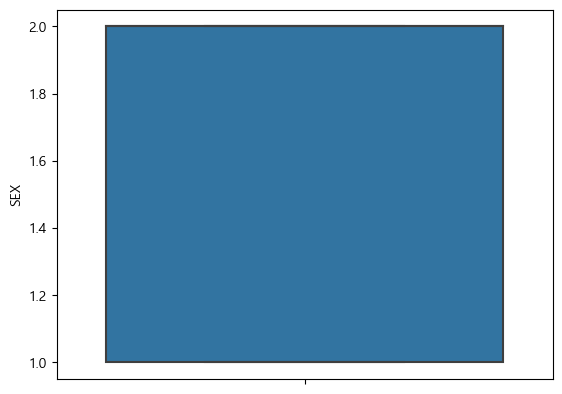

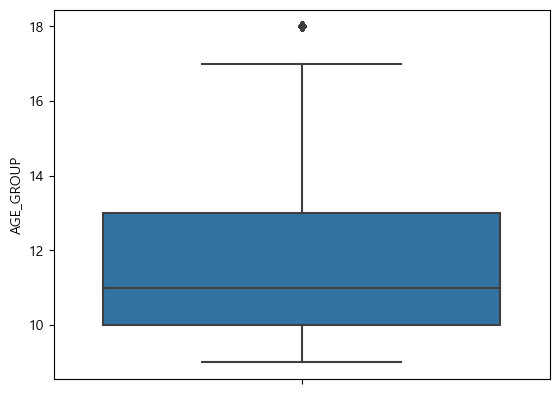

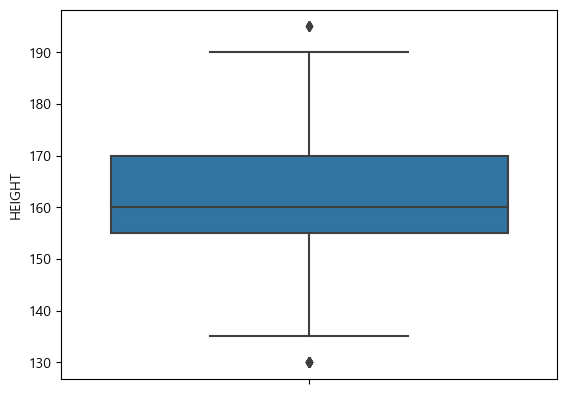

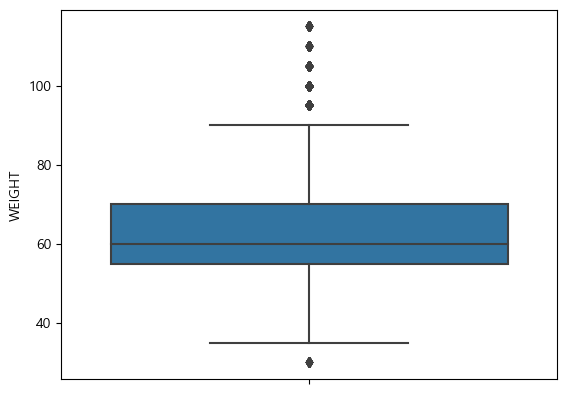

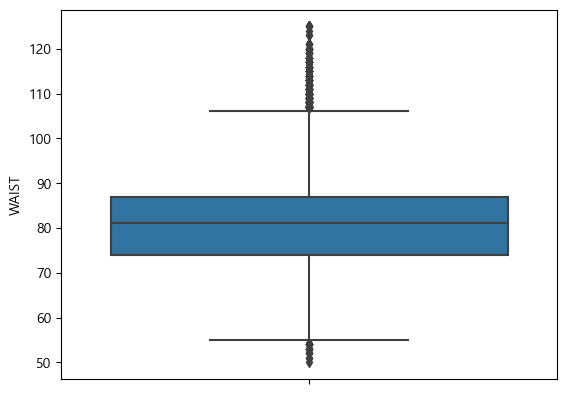

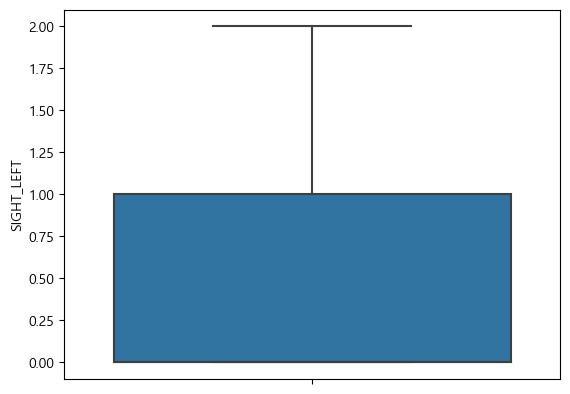

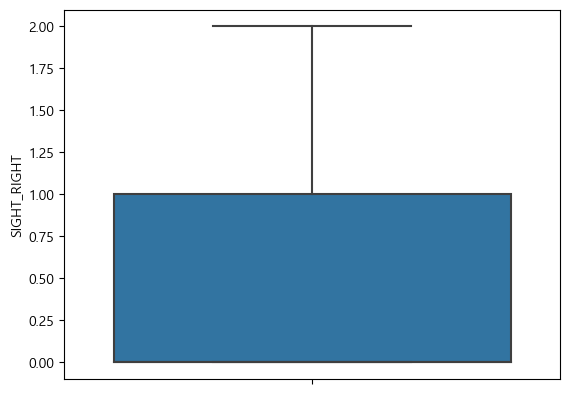

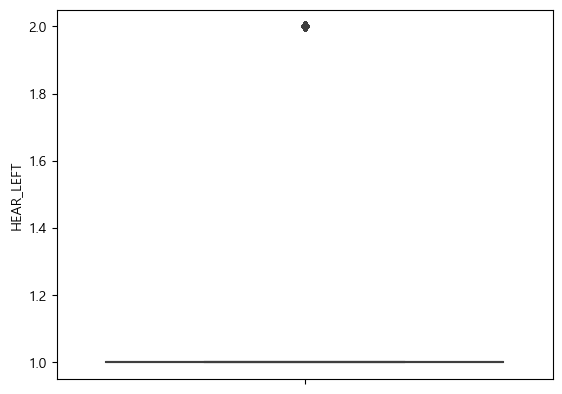

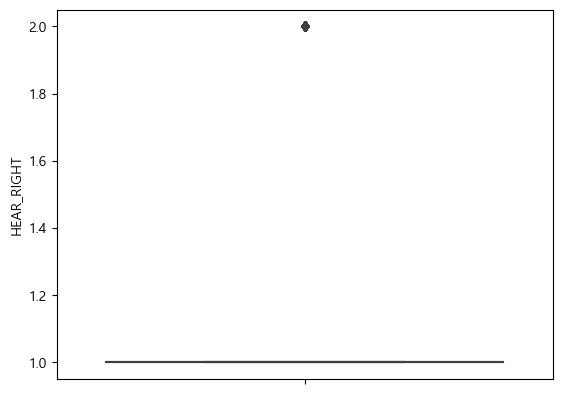

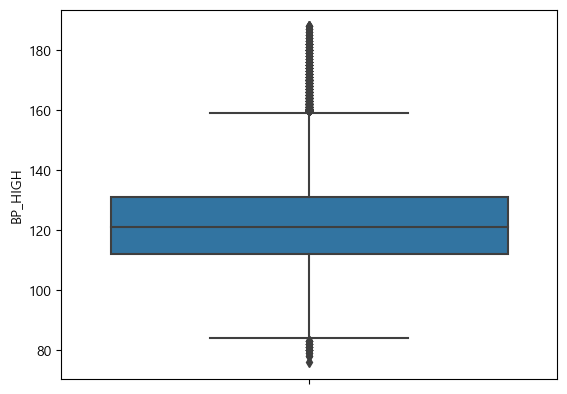

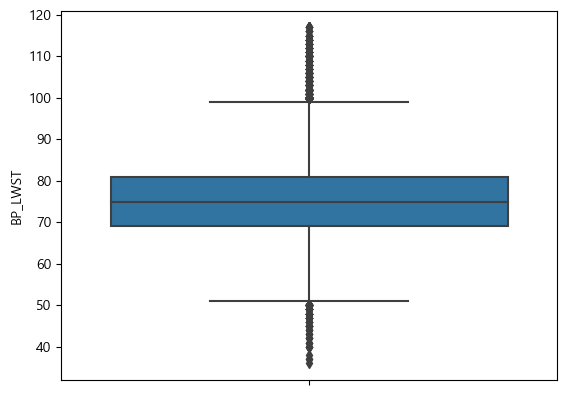

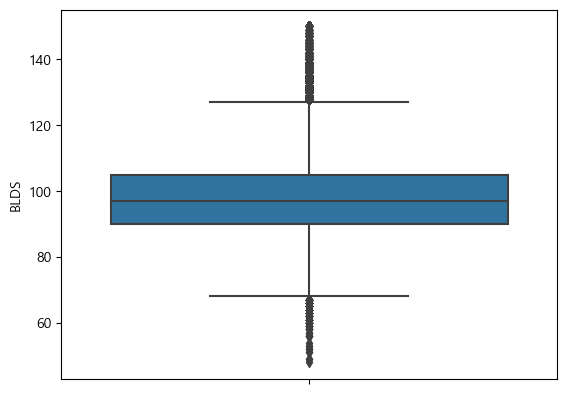

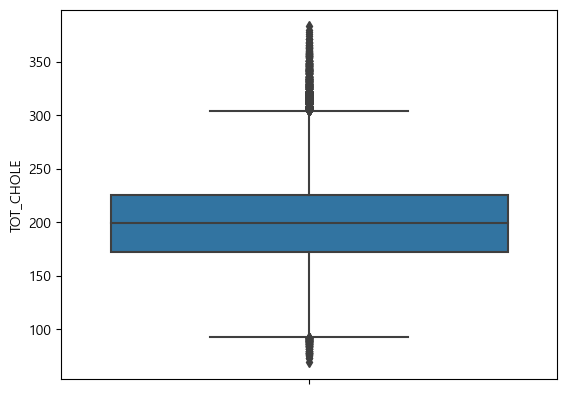

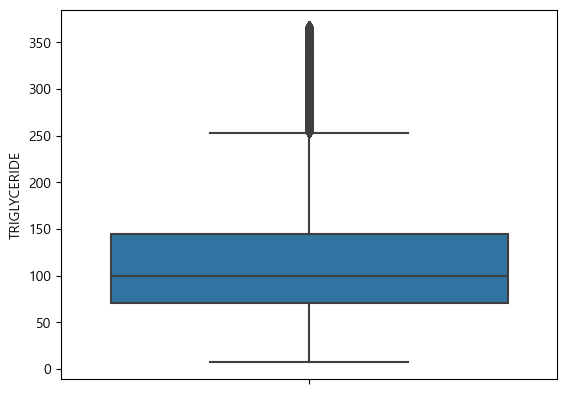

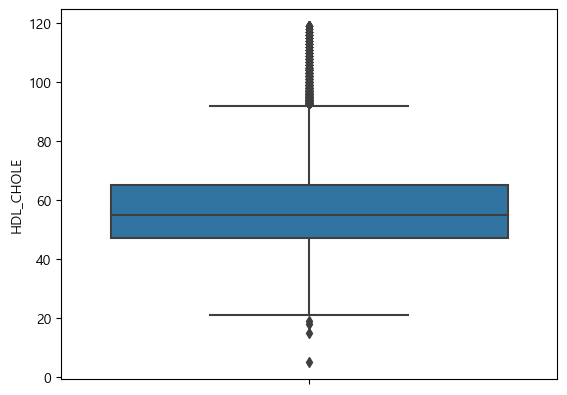

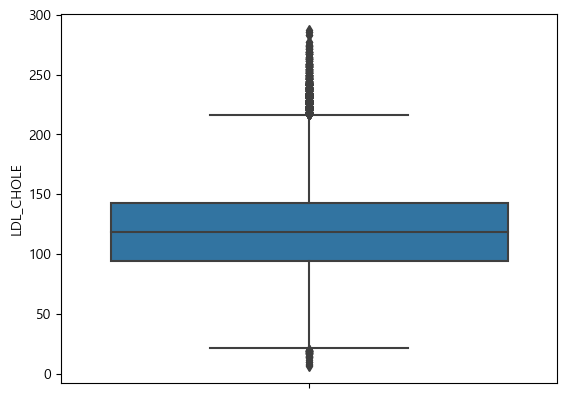

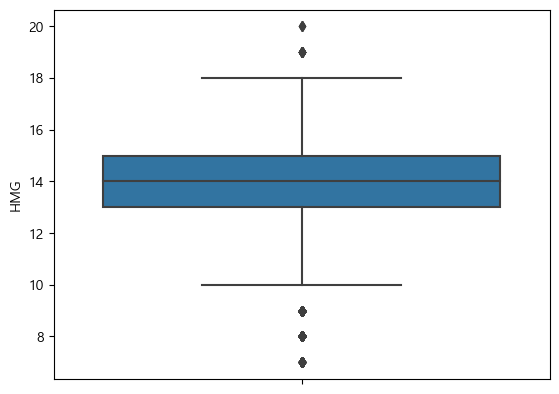

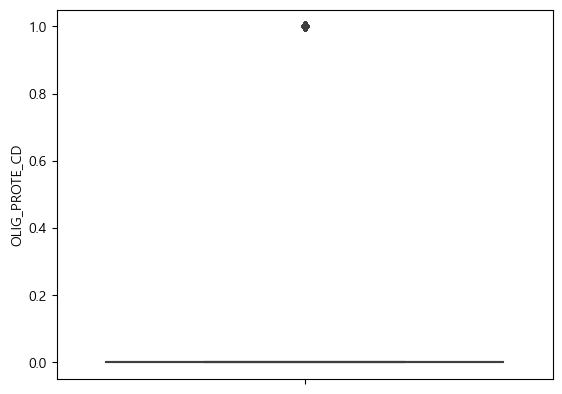

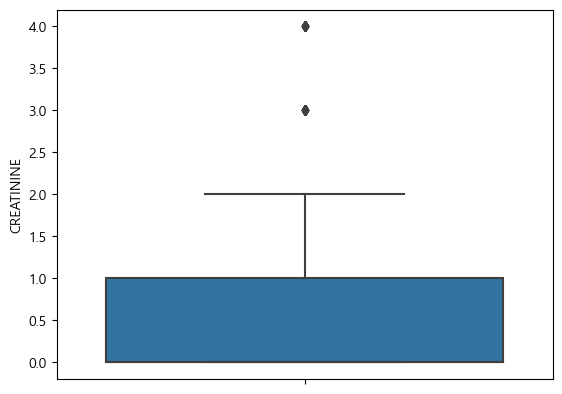

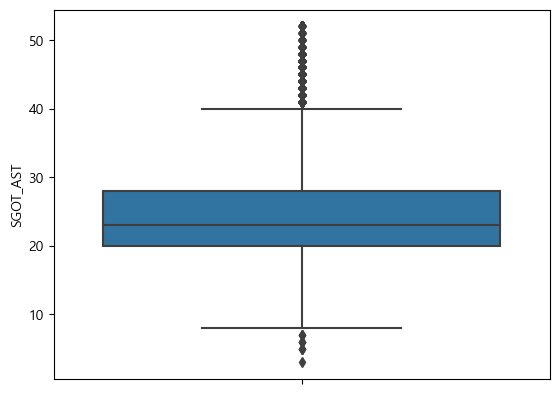

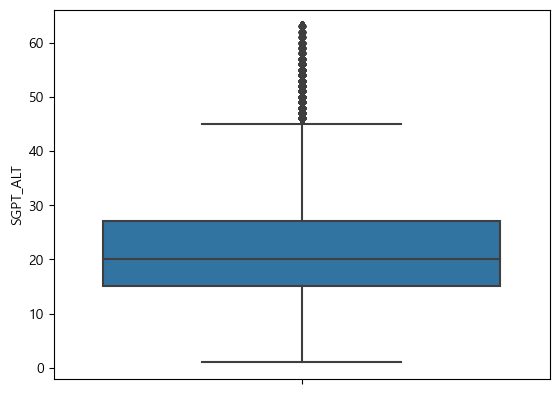

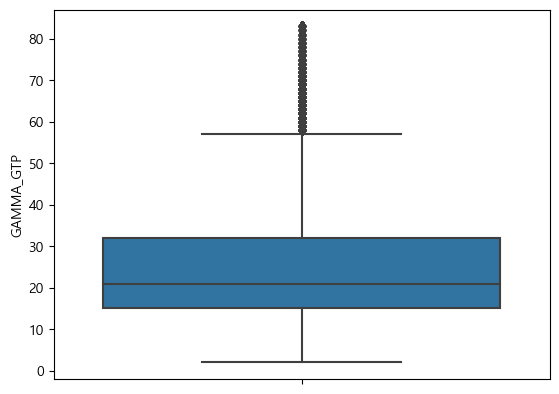

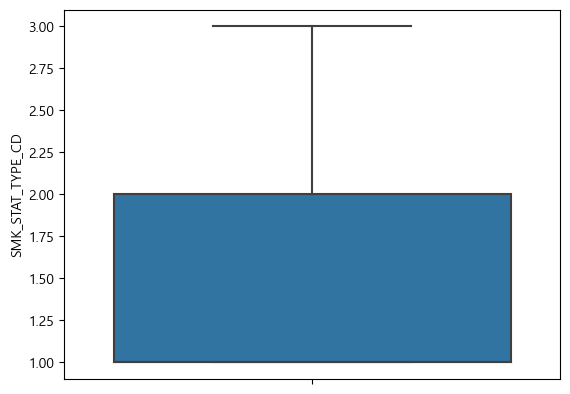

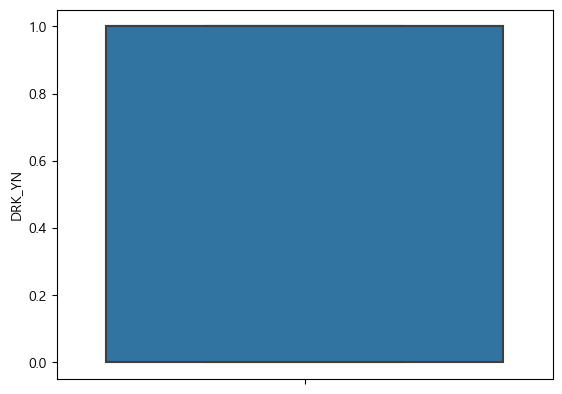

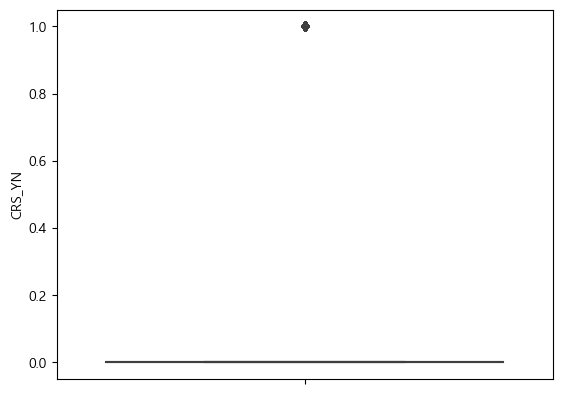

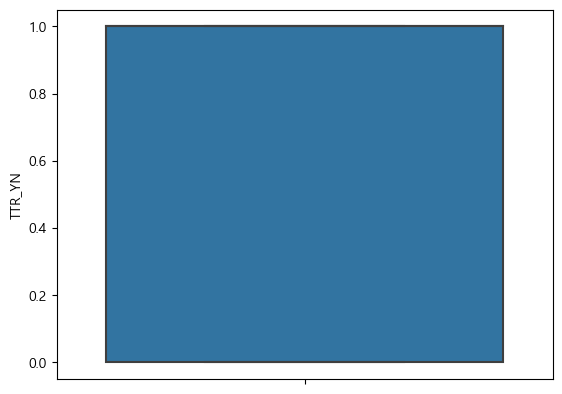

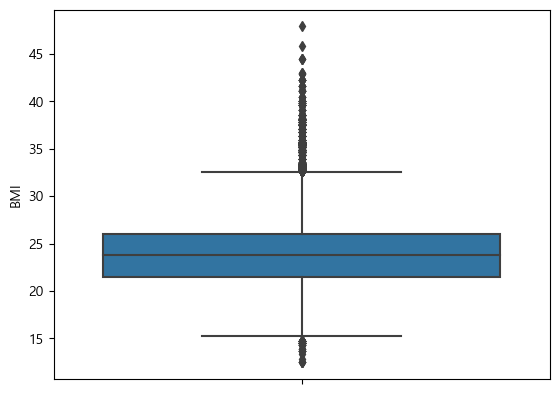

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 위에서 주어진 리스트를 그대로 사용
columns = [ 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
        'CRS_YN', 'TTR_YN','BMI']

# for 문을 사용하여 각각의 boxplot 그리기
for i in columns:
    sns.boxplot(y=i, data=data)
    plt.show()


## 9. index 재정렬 = dataNew4 / 최종데이터 = data


[최종변수]

1. 성별
2. 나이대
3. 허리둘레
4. 시력 좌우(2)
5. 청력 좌우(2)
6. 혈압(수축, 이완)(2)
7. 식전혈당
8. 총콜레스테롤
9. 트리글리세라이드
10. 콜레스테롤(HDL,LDL)(2)
11. 혈색소
12. 요단백
13. 혈청크레아티닌
14. 혈청지오티(AST,ALT)(2)
15. 감마지피티
16. 음주여부
17. 치아우식증(충치)
18. 치석
19. BMI

- 총 24개의 변수

In [6]:
Columns = [ 'SEX', 'AGE_GROUP',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'DRK_YN',
        'CRS_YN', 'TTR_YN','BMI']

dataNew4=data
dataNew4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        104436 non-null  int64  
 1   SIDO              104436 non-null  int64  
 2   SEX               104436 non-null  int64  
 3   AGE_GROUP         104436 non-null  int64  
 4   HEIGHT            104436 non-null  int64  
 5   WEIGHT            104436 non-null  int64  
 6   WAIST             104436 non-null  float64
 7   SIGHT_LEFT        104436 non-null  float64
 8   SIGHT_RIGHT       104436 non-null  float64
 9   HEAR_LEFT         104436 non-null  float64
 10  HEAR_RIGHT        104436 non-null  float64
 11  BP_HIGH           104436 non-null  float64
 12  BP_LWST           104436 non-null  float64
 13  BLDS              104436 non-null  float64
 14  TOT_CHOLE         104436 non-null  float64
 15  TRIGLYCERIDE      104436 non-null  float64
 16  HDL_CHOLE         10

In [7]:
dataNew4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        104436 non-null  int64  
 1   SIDO              104436 non-null  int64  
 2   SEX               104436 non-null  int64  
 3   AGE_GROUP         104436 non-null  int64  
 4   HEIGHT            104436 non-null  int64  
 5   WEIGHT            104436 non-null  int64  
 6   WAIST             104436 non-null  float64
 7   SIGHT_LEFT        104436 non-null  float64
 8   SIGHT_RIGHT       104436 non-null  float64
 9   HEAR_LEFT         104436 non-null  float64
 10  HEAR_RIGHT        104436 non-null  float64
 11  BP_HIGH           104436 non-null  float64
 12  BP_LWST           104436 non-null  float64
 13  BLDS              104436 non-null  float64
 14  TOT_CHOLE         104436 non-null  float64
 15  TRIGLYCERIDE      104436 non-null  float64
 16  HDL_CHOLE         10

In [8]:
data=dataNew4[Columns]

category_columns=['SEX','AGE_GROUP','HEAR_LEFT','HEAR_RIGHT',
                 'OLIG_PROTE_CD','DRK_YN','CRS_YN','TTR_YN']

data[category_columns]=data[category_columns].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   SEX            104436 non-null  category
 1   AGE_GROUP      104436 non-null  category
 2   WAIST          104436 non-null  float64 
 3   SIGHT_LEFT     104436 non-null  float64 
 4   SIGHT_RIGHT    104436 non-null  float64 
 5   HEAR_LEFT      104436 non-null  category
 6   HEAR_RIGHT     104436 non-null  category
 7   BP_HIGH        104436 non-null  float64 
 8   BP_LWST        104436 non-null  float64 
 9   BLDS           104436 non-null  float64 
 10  TOT_CHOLE      104436 non-null  float64 
 11  TRIGLYCERIDE   104436 non-null  float64 
 12  HDL_CHOLE      104436 non-null  float64 
 13  LDL_CHOLE      104436 non-null  float64 
 14  HMG            104436 non-null  float64 
 15  OLIG_PROTE_CD  104436 non-null  category
 16  CREATININE     104436 non-null  float64 
 17  SGOT_AST  

C:\Users\wandong\AppData\Local\Temp\ipykernel_25804\2699511895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[category_columns]=data[category_columns].astype('category')


In [9]:
target=dataNew4.iloc[:,24:25]
target=target.astype('category')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   SMK_STAT_TYPE_CD  104436 non-null  category
dtypes: category(1)
memory usage: 102.2 KB


## 10. 데이터나누기 (8:2)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,Y_train,Y_test=train_test_split(data,target,test_size=0.2,random_state=3535)
x_train

,SEX,AGE_GROUP,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
8049,2,13,75.0,1.0,1.0,1.0,1.0,106.0,65.0,81.0,198.0,223.0,50.0,102.0,13.0,0,0.0,19.0,17.0,18.0,1.0,0.0,0.0,23.437500
72760,1,9,93.0,1.0,1.0,1.0,1.0,110.0,68.0,103.0,204.0,126.0,55.0,124.0,15.0,0,0.0,18.0,27.0,32.0,1.0,0.0,0.0,25.711662
5368,2,11,70.0,1.0,1.0,1.0,1.0,116.0,76.0,98.0,223.0,54.0,63.0,149.0,14.0,0,0.0,14.0,16.0,13.0,1.0,0.0,0.0,21.484375
57501,2,13,82.0,0.0,0.0,1.0,1.0,117.0,73.0,102.0,234.0,143.0,44.0,161.0,12.0,0,0.0,33.0,23.0,24.0,1.0,0.0,1.0,22.892820
101191,1,13,90.0,0.0,0.0,1.0,1.0,128.0,89.0,108.0,238.0,78.0,45.0,177.0,14.0,0,0.0,45.0,50.0,31.0,1.0,0.0,0.0,29.384757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31112,2,10,71.0,0.0,0.0,1.0,1.0,116.0,64.0,84.0,186.0,93.0,57.0,110.0,12.0,0,0.0,18.0,19.0,18.0,1.0,1.0,1.0,19.531250
88366,2,11,100.0,1.0,0.0,1.0,1.0,123.0,60.0,101.0,250.0,145.0,42.0,179.0,13.0,0,0.0,29.0,34.0,25.0,1.0,1.0,1.0,35.555556
64765,2,10,86.0,1.0,1.0,1.0,1.0,130.0,81.0,100.0,243.0,80.0,63.0,164.0,13.0,0,0.0,18.0,11.0,11.0,1.0,0.0,1.0,22.038567
53351,2,9,64.0,0.0,0.0,1.0,1.0,115.0,63.0,85.0,166.0,54.0,71.0,84.0,12.0,0,0.0,15.0,12.0,19.0,0.0,0.0,1.0,18.365473


In [11]:
Y_train

,SMK_STAT_TYPE_CD
8049,1.0
72760,3.0
5368,1.0
57501,3.0
101191,2.0
...,...
31112,1.0
88366,1.0
64765,1.0
53351,1.0


## Random Forest 
- n_estimators = 100
- max_depth = 12
- min_samples_leaf = 10
- min_samples_split = 6

- accuracy = 0.7207

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(x_train,Y_train)

rf_parameters ={'n_estimators':[100,300],'max_depth':[5,12],
            'min_samples_leaf':[2,4],'min_samples_split':[10,5]}
grid_rf = GridSearchCV(rf_clf,param_grid=rf_parameters,cv=3,refit=True)
grid_rf.fit(x_train,Y_train)

scores_rf_df = pd.DataFrame(grid_rf.cv_results_)
scores_rf_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.693422,14,0.689515,0.697942,0.692808
1,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.694918,11,0.691203,0.699235,0.694316
2,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.692512,16,0.689084,0.696003,0.692449
3,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.694559,12,0.691490,0.698122,0.694064
4,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.693960,13,0.689838,0.698086,0.693957
5,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.695301,9,0.691670,0.699379,0.694854
6,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.693338,15,0.689874,0.696470,0.693669
7,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.695217,10,0.692424,0.698589,0.694639
8,"{'max_depth': 12, 'min_samples_leaf': 2, 'min_...",0.720137,7,0.719856,0.722288,0.718266
9,"{'max_depth': 12, 'min_samples_leaf': 2, 'min_...",0.721525,3,0.722190,0.723545,0.718841


In [13]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

scores_rf_df[scores_rf_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,76.172636,5.131255,5.995266,0.187408,12,4,10,300,"{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}",0.722801,0.722504,0.720205,0.721837,0.00116,1


In [17]:
best_rf_clf=grid_rf.best_estimator_
y_pred=best_rf_clf.predict(x_test)
test_accuracy=accuracy_score(Y_test,y_pred)
test_accuracy

0.7168709306779012

In [14]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# rf_clf=RandomForestClassifier(n_estimators=300,max_depth=12,min_samples_leaf=4,min_samples_split=10)
# rf_clf.fit(x_train,Y_train)
# predict1=rf_clf.predict(x_test)
# print(accuracy_score(Y_test,predict1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7161049406357717


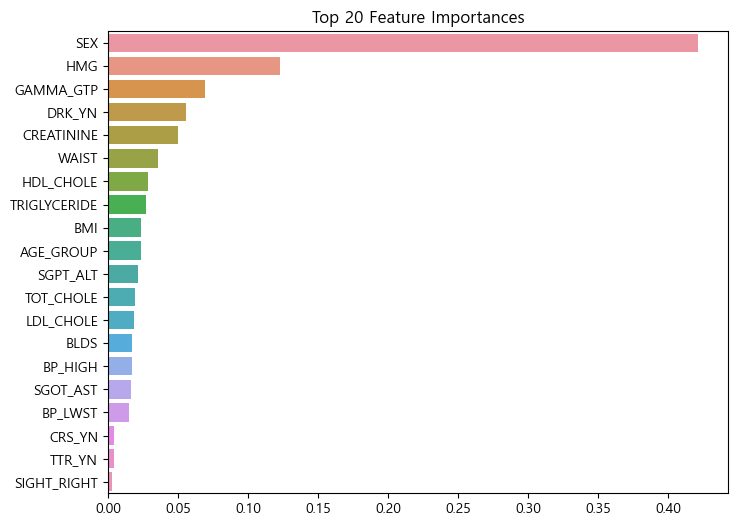

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = best_rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.86      0.85     13767
         2.0       0.45      0.52      0.48      4018
         3.0       0.49      0.33      0.39      3103

    accuracy                           0.72     20888
   macro avg       0.59      0.57      0.57     20888
weighted avg       0.71      0.72      0.71     20888



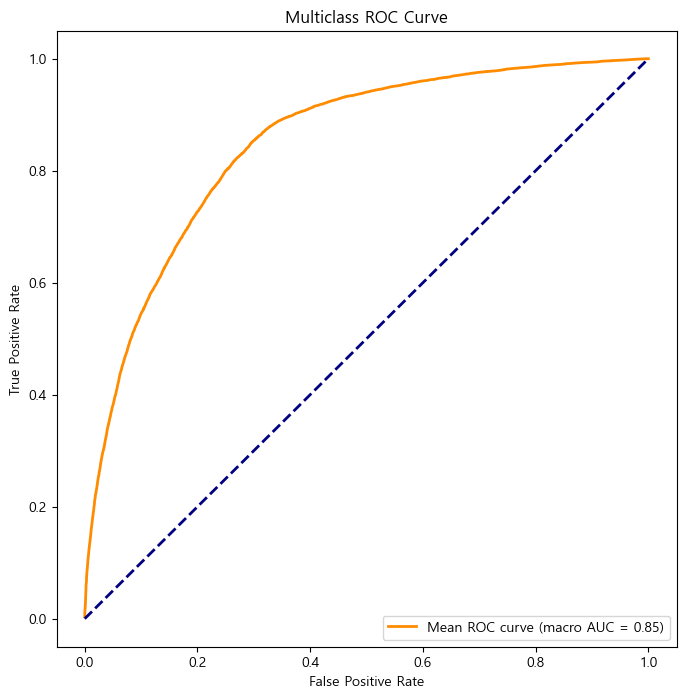

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 예측 확률 얻기
y_score = best_rf_clf.predict_proba(x_test)

# 각 클래스에 대한 ROC curve 생성
n_classes = len(best_rf_clf.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = label_binarize(Y_test, classes=best_rf_clf.classes_)
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 평균 ROC curve 생성
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# ROC curve 그리기
plt.figure(figsize=(8, 8))

plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2, label=f'Mean ROC curve (macro AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


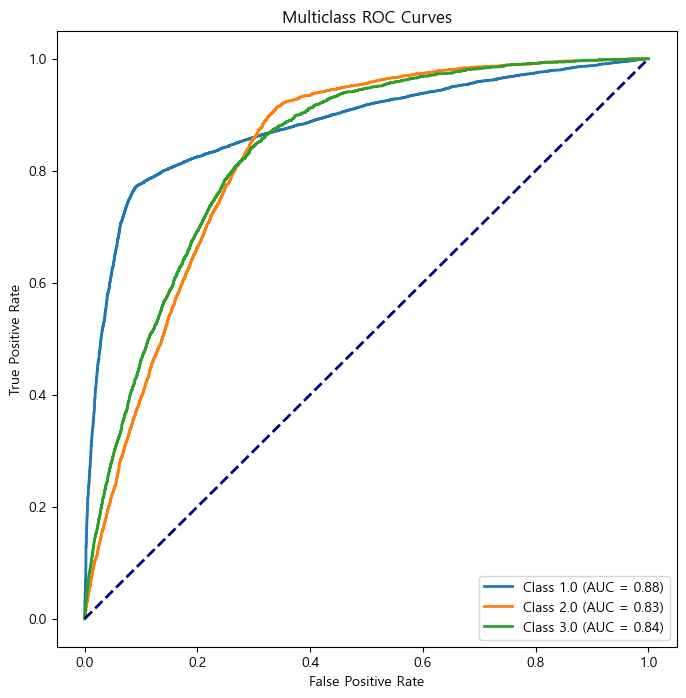

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 얻기
y_score = best_rf_clf.predict_proba(x_test)

# 각 클래스에 대한 ROC curve 생성
n_classes = len(best_rf_clf.classes_)

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve((Y_test == best_rf_clf.classes_[i]).astype(int), y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {best_rf_clf.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc='lower right')
plt.show()
